---------------------------------------------------------------------------------
Importing Libraries
---------------------------------------------------------------------------------



/home/oarreche@ads.iu.edu/anaconda3/envs/HITL/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---------------------------------------------------------------------------------
Defining Metric Equations
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Generating Descriptive Graph
---------------------------------------------------------------------------------



ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

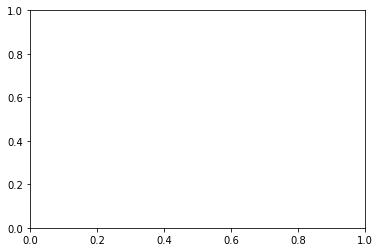

In [2]:

#---------------------------------------------------------------------
# Importing Libraries
print('---------------------------------------------------------------------------------')
print('Importing Libraries')
print('---------------------------------------------------------------------------------')
print('')

import numpy
import time
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from imblearn.over_sampling import RandomOverSampler
import shap
from scipy.special import softmax
np.random.seed(0)
from sklearn.model_selection import train_test_split
import sklearn
#---------------------------------------------------------------------
# Defining metric equations

print('---------------------------------------------------------------------------------')
print('Defining Metric Equations')
print('---------------------------------------------------------------------------------')
print('')
def print_feature_importances_shap_values(shap_values, features):
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")


def ACC(TP,TN,FP,FN):
    Acc = (TP+TN)/(TP+FP+FN+TN)
    return Acc
def ACC_2 (TP, FN):
    ac = (TP/(TP+FN))
    return ac
def PRECISION(TP,FP):
    Precision = TP/(TP+FP)
    return Precision
def RECALL(TP,FN):
    Recall = TP/(TP+FN)
    return Recall
def F1(Recall, Precision):
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return F1
def BACC(TP,TN,FP,FN):
    BACC =(TP/(TP+FN)+ TN/(TN+FP))*0.5
    return BACC
def MCC(TP,TN,FP,FN):
    MCC = (TN*TP-FN*FP)/(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**.5)
    return MCC
def AUC_ROC(y_test_bin,y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    auc_avg = 0
    counting = 0
    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
      auc_avg += auc(fpr[i], tpr[i])
      counting = i+1
    return auc_avg/counting

def oversample(X_train, y_train):
    oversample = RandomOverSampler(sampling_strategy='minority')
    # Convert to numpy and oversample
    x_np = X_train.to_numpy()
    y_np = y_train.to_numpy()
    x_np, y_np = oversample.fit_resample(x_np, y_np)

    # Convert back to pandas
    x_over = pd.DataFrame(x_np, columns=X_train.columns)
    y_over = pd.Series(y_np)
    return x_over, y_over

#---------------------------------------------------------------------


print('---------------------------------------------------------------------------------')
print('Generating Descriptive Graph')
print('---------------------------------------------------------------------------------')
print('')

x_axis_cic = [0, 5, 10, 20, 40] 
x_axis_sml = [0, 5, 10, 20] 

# CICIDS
#SHAP-DeepLift
#10, #20 #30 #40
80.23
#DNN 
y_axis_shap = [0.8015, 0.8023,0.8023,0.8023]

y_axis_ig = [0.8015, 0.8762, 0.8023,0.0714]

y_axis_lrp = [0.8015, 0.8023, 0.8023, 0.0021]

plt.clf()

# Plot the first line
plt.plot(x_axis_cic, y_axis_shap, label='RF', color='blue', linestyle='--', marker='o')

# Plot the second line
plt.plot(x_axis_cic, y_axis_ig, label='DNN', color='red', linestyle='--', marker='x')

# Plot the third line
plt.plot(x_axis_cic, y_axis_lrp, label='LGBM', color='green', linestyle='--', marker='s')



# Enable grid lines (both major and minor grids)
plt.grid()

# Customize grid lines (optional)
# plt.grid()

# Add labels and a legend
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.legend()

# Set the title of the plot
# plt.title('Accuracy x Features - SHAP CIC')

# Show the plot
plt.show()
plt.savefig('GRAPH_ACC_SHAP_CIC.png')
plt.clf()

print('AUC - CIC SHAP')

auc = np.trapz(y_axis_shap, x_axis_cic)/x_axis_cic[-1]
print('RF')
print(f"AUC: {auc}")

auc = np.trapz(y_axis_ig, x_axis_cic)/x_axis_cic[-1]
print('DNN')
print(f"AUC: {auc}")

auc = np.trapz(y_axis_lrp,  x_axis_cic)/x_axis_cic[-1]
print('LGBM')
print(f"AUC: {auc}")





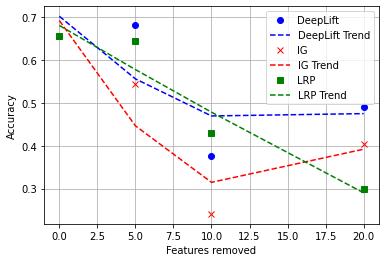

Simargl


<Figure size 432x288 with 0 Axes>

In [22]:
###########################################################################################################################################################################################################################################################################################################################
#DNN-SML

#5, 10, #20 #40 #80
x_axis_sml = [0, 5 , 10, 20]

y_axis_shap = [0.655,	0.6804,	0.3758,	0.4903
 ]

y_axis_ig = [ 0.655,	0.54448,	0.24088,	0.40408]

y_axis_lrp = [0.655722,	0.64296,	0.429,	0.29814,
]


plt.clf()

# Plot the first line

plt.plot(x_axis_sml, y_axis_shap, label='DeepLift', color='blue',linestyle='', marker='o')

# Fit and plot trend lines
z = np.polyfit(x_axis_sml, y_axis_shap, 2)
p = np.poly1d(z)
plt.plot(x_axis_sml, p(x_axis_sml), label='DeepLift Trend', linestyle='--', color='blue')


# Plot the second line

plt.plot(x_axis_sml, y_axis_ig, label='IG', color='red', linestyle='', marker='x')

# Fit and plot trend lines

z = np.polyfit(x_axis_sml, y_axis_ig, 2)
p = np.poly1d(z)
plt.plot(x_axis_sml, p(x_axis_sml), label='IG Trend', linestyle='--', color='red')

# Plot the third line

plt.plot(x_axis_sml, y_axis_lrp, label='LRP', color='green',linestyle='', marker='s')

# Fit and plot trend lines

z = np.polyfit(x_axis_sml, y_axis_lrp, 2)
p = np.poly1d(z)
plt.plot(x_axis_sml, p(x_axis_sml), label='LRP Trend', linestyle='--', color='green')






# Enable grid lines (both major and minor grids)

plt.grid()

# Customize grid lines (optional)

# plt.grid()

# Add labels and a legend

plt.xlabel('Features removed')

plt.ylabel('Accuracy')

plt.legend()

# Set the title of the plot

# plt.title('Accuracy x Features - SHAP SIMARGL')

# Show the plot

plt.show()

plt.savefig('GRAPH_D_A_SML.png')

plt.clf()

print('Simargl')


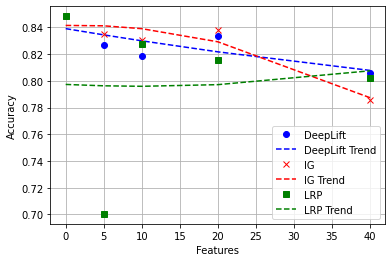

NSL KDD


<Figure size 432x288 with 0 Axes>

In [8]:
###########################################################################################################################################################################################################################################################################################################################
#DNN-CIC
#5, 10, #20 #40 #80
x_axis_cic = [0, 5, 10, 20, 40] 

#DNN
y_axis_shap = [0.84834,	0.82678,	0.81858,	0.83356,	0.80566
]
#0, 5, 10
y_axis_ig = [0.84834,	0.83542,	0.8308,	0.83792,	0.7858
]

y_axis_lrp = [0.84834,	0.7004,	0.8276,	0.81532,	0.80248
]

plt.clf()

# Plot the first line

plt.plot(x_axis_cic, y_axis_shap, label='DeepLift', color='blue',linestyle='', marker='o')

# Fit and plot trend lines
z = np.polyfit(x_axis_cic, y_axis_shap, 2)
p = np.poly1d(z)
plt.plot(x_axis_cic, p(x_axis_cic), label='DeepLift Trend', linestyle='--', color='blue')


# Plot the second line

plt.plot(x_axis_cic, y_axis_ig, label='IG', color='red', linestyle='', marker='x')

# Fit and plot trend lines

z = np.polyfit(x_axis_cic, y_axis_ig, 2)
p = np.poly1d(z)
plt.plot(x_axis_cic, p(x_axis_cic), label='IG Trend', linestyle='--', color='red')

# Plot the third line

plt.plot(x_axis_cic, y_axis_lrp, label='LRP', color='green',linestyle='', marker='s')

# Fit and plot trend lines

z = np.polyfit(x_axis_cic, y_axis_lrp, 2)
p = np.poly1d(z)
plt.plot(x_axis_cic, p(x_axis_cic), label='LRP Trend', linestyle='--', color='green')






# Enable grid lines (both major and minor grids)

plt.grid()

# Customize grid lines (optional)

# plt.grid()

# Add labels and a legend

plt.xlabel('Features')

plt.ylabel('Accuracy')

plt.legend()

# Set the title of the plot

# plt.title('Accuracy x Features - SHAP SIMARGL')

# Show the plot

plt.show()

plt.savefig('GRAPH_D_A_CIC.png')

plt.clf()

print('NSL KDD')

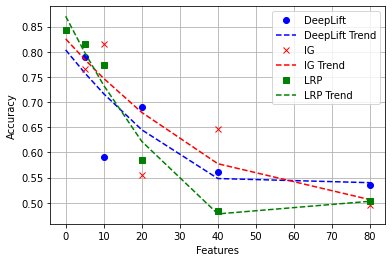

NSL KDD


<Figure size 432x288 with 0 Axes>

In [9]:
###########################################################################################################################################################################################################################################################################################################################
#DNN NSL-KDD
#5, 10, #20 #40 #80
x_axis_cic = [0, 5, 10, 20, 40, 80] 

#DNN
y_axis_shap = [0.8429,	0.78984,	0.5903,	0.690888,	0.56132,	0.5355]
#0, 5, 10
y_axis_ig = [0.8429,	0.76576,	0.81536,	0.5544,	0.6457,	0.49588]

y_axis_lrp = [0.8429,	0.81582,	0.7745,	0.58476,	0.48346,	0.50312]

plt.clf()

# Plot the first line

plt.plot(x_axis_cic, y_axis_shap, label='DeepLift', color='blue',linestyle='', marker='o')

# Fit and plot trend lines
z = np.polyfit(x_axis_cic, y_axis_shap, 2)
p = np.poly1d(z)
plt.plot(x_axis_cic, p(x_axis_cic), label='DeepLift Trend', linestyle='--', color='blue')


# Plot the second line

plt.plot(x_axis_cic, y_axis_ig, label='IG', color='red', linestyle='', marker='x')

# Fit and plot trend lines

z = np.polyfit(x_axis_cic, y_axis_ig, 2)
p = np.poly1d(z)
plt.plot(x_axis_cic, p(x_axis_cic), label='IG Trend', linestyle='--', color='red')

# Plot the third line

plt.plot(x_axis_cic, y_axis_lrp, label='LRP', color='green',linestyle='', marker='s')

# Fit and plot trend lines

z = np.polyfit(x_axis_cic, y_axis_lrp, 2)
p = np.poly1d(z)
plt.plot(x_axis_cic, p(x_axis_cic), label='LRP Trend', linestyle='--', color='green')






# Enable grid lines (both major and minor grids)

plt.grid()

# Customize grid lines (optional)

# plt.grid()

# Add labels and a legend

plt.xlabel('Features')

plt.ylabel('Accuracy')

plt.legend()

# Set the title of the plot

# plt.title('Accuracy x Features - SHAP SIMARGL')

# Show the plot

plt.show()

plt.savefig('GRAPH_D_A_SML.png')

plt.clf()

print('NSL KDD')

In [ ]:
# import numpy as np

# # Fit and plot trend lines
# z = np.polyfit(x_axis_cic, y_axis_shap, 2)
# p = np.poly1d(z)
# plt.plot(x_axis_cic, p(x_axis_cic), label='DeepLift Trend', color='blue')

# z = np.polyfit(x_axis_cic, y_axis_ig, 2)
# p = np.poly1d(z)
# plt.plot(x_axis_cic, p(x_axis_cic), label='IG Trend', color='red')

# z = np.polyfit(x_axis_cic, y_axis_lrp, 2)
# p = np.poly1d(z)
# plt.plot(x_axis_cic, p(x_axis_cic), label='LRP Trend', color='green')

# # Plot the original data
# plt.plot(x_axis_cic, y_axis_shap, label='DeepLift', color='blue', linestyle='--', marker='o')
# plt.plot(x_axis_cic, y_axis_ig, label='IG', color='red', linestyle='--', marker='x')
# plt.plot(x_axis_cic, y_axis_lrp, label='LRP', color='green', linestyle='--', marker='s')

# plt.legend()
# plt.show()